<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/contribuciones_estudiantes/ejemplo_voting_regresor_con_pesos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Cargar y explorar el dataset
# Importar las bibliotecas necesarias: fetch_california_housing para cargar el dataset y pandas para manipular datos
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [ ]:
# Cargar el dataset California Housing con as_frame=True para obtener un DataFrame
data = fetch_california_housing(as_frame=True)
# Extraer el DataFrame, que contiene las columnas predictoras y la columna objetivo (MedHouseVal)
df = data.frame

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# 2. Preparar los datos
# Importar herramientas para dividir los datos y escalar las características
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separar las variables predictoras (X) y la variable objetivo (y)
# Excluir la columna 'MedHouseVal' (valor de la vivienda) de X, usando axis=1 para indicar que es una columna
X = df.drop('MedHouseVal', axis=1)
# Asignar la columna 'MedHouseVal' como la variable objetivo y (valores de viviendas en cientos de miles de dólares)
y = df['MedHouseVal']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento (75%) y prueba (25%)
# random_state=42 asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Crear un escalador para estandarizar las características (restar la media y dividir por la desviación estándar)
# Esto es necesario para modelos como KNN y SVR, que son sensibles a la escala de las variables
scaler = StandardScaler()

In [ ]:
# Ajustar el escalador a los datos de entrenamiento y transformarlos (calcula media y desviación estándar)
X_train_scaled = scaler.fit_transform(X_train)
# Transformar los datos de prueba usando el mismo escalador (evita filtración de datos)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 3. Entrenar los modelos
# Importar las clases de los modelos de regresión de sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
# Entrenar los cuatro modelos de regresión:
# - LinearRegression: Modelo lineal que asume una relación lineal entre características y el valor de la vivienda
lr = LinearRegression().fit(X_train, y_train)
# - DecisionTreeRegressor: Árbol de decisiones con profundidad máxima de 5 para evitar sobreajuste
tree = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
# - KNeighborsRegressor: Predice basado en los 5 vecinos más cercanos; usa datos escalados
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)
# - SVR: Máquina de soporte vectorial para regresión; usa datos escalados
svm = SVR().fit(X_train_scaled, y_train)

In [ ]:
# 4. Crear la observación de prueba
# Crear un DataFrame con una sola fila que representa una vivienda con las características especificadas
# Solo MedInc (3.5, equivalente a $35,000) y AveRooms (4) son requeridos por la pregunta; los demás valores son del ejemplo
sample = pd.DataFrame([{
    'MedInc': 3.5,      # Ingreso medio del vecindario ($35,000 en decenas de miles)
    'HouseAge': 25,     # Edad promedio de las casas (25 años)
    'AveRooms': 4,      # Promedio de 4 habitaciones por vivienda
    'AveBedrms': 1,     # Promedio de 1 dormitorio por vivienda
    'Population': 1000, # Población del área (1000 personas)
    'AveOccup': 3,      # Promedio de 3 ocupantes por hogar
    'Latitude': 34,     # Latitud geográfica (cerca de Los Ángeles)
    'Longitude': -118   # Longitud geográfica
}])

In [ ]:
# Escalar la observación de prueba para los modelos KNN y SVR, usando el mismo escalador ajustado en X_train
sample_scaled = scaler.transform(sample)

# 5. Hacer las predicciones
# Predecir el valor de la vivienda con cada modelo y convertir el resultado a dólares (multiplicar por 100,000)
# Redondear a 2 decimales para mayor claridad
# Regresión Lineal usa datos no escalados
print("🔵 Regresión Lineal:", round(lr.predict(sample)[0] * 100000, 2), "USD")
# Árbol de Decisión usa datos no escalados
print("🌳 Árbol de Decisión:", round(tree.predict(sample)[0] * 100000, 2), "USD")
# KNN usa datos escalados, predice basado en los 5 vecinos más cercanos
print("📍 KNN:", round(knn.predict(sample_scaled)[0] * 100000, 2), "USD")
# SVR usa datos escalados, predice basado en un hiperplano de regresión
print("📊 SVR:", round(svm.predict(sample_scaled)[0] * 100000, 2), "USD")

🔵 Regresión Lineal: 197256.72 USD
🌳 Árbol de Decisión: 165550.25 USD
📍 KNN: 189560.0 USD
📊 SVR: 186865.44 USD


In [ ]:
# Convertir lo anterior usando
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las variables predictoras (X) y la variable objetivo (y)
# Excluir la columna 'MedHouseVal' (valor de la vivienda) de X, usando axis=1 para indicar que es una columna
X = df.drop('MedHouseVal', axis=1)
# Asignar la columna 'MedHouseVal' como la variable objetivo y (valores de viviendas en cientos de miles de dólares)
y = df['MedHouseVal']

# Dividir los datos en conjuntos de entrenamiento (75%) y prueba (25%)
# random_state=42 asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformarlos (calcula media y desviación estándar)
X_train_scaled = scaler.fit_transform(X_train)
# Transformar los datos de prueba usando el mismo escalador (evita filtración de datos)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 3. Entrenar los modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

# Generar instancia de los modelos
lr_scaled = LinearRegression().fit(X_train_scaled, y_train)
tree_scaled = DecisionTreeRegressor(max_depth=5).fit(X_train_scaled, y_train)
knn_scaled = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)
svm_scaled = SVR().fit(X_train_scaled, y_train)

# Crear el VotingRegressor
voting = VotingRegressor(estimators=[
    ('lr', lr_scaled),
    ('tree', tree_scaled),
    ('knn', knn_scaled),
    ('svm', svm_scaled)
])
voting.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('tree', DecisionTreeRegressor(max_depth=5)),
                            ('knn', KNeighborsRegressor()), ('svm', SVR())])

In [ ]:
# Predecir con la observación escalada
voting_pred = voting.predict(sample_scaled)[0]

# Mostrar resultado
print("🤝 VotingRegressor:", round(voting_pred * 100000, 2), "USD")


🤝 VotingRegressor: 184808.1 USD


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en X_test escalado (todos usan el mismo conjunto)
models = {
    "Regresión Lineal": lr_scaled,
    "Árbol de Decisión": tree_scaled,
    "KNN": knn_scaled,
    "SVR": svm_scaled,
    "VotingRegressor": voting
}

print("📊 Comparación de desempeño en el conjunto de prueba:\n")
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:<20} | MSE: {mse:.4f} | R²: {r2:.4f}")


📊 Comparación de desempeño en el conjunto de prueba:

Regresión Lineal     | MSE: 0.5411 | R²: 0.5911
Árbol de Decisión    | MSE: 0.5268 | R²: 0.6019
KNN                  | MSE: 0.4317 | R²: 0.6738
SVR                  | MSE: 0.3510 | R²: 0.7347
VotingRegressor      | MSE: 0.3771 | R²: 0.7150


In [ ]:
voting_weighted = VotingRegressor(estimators=[
    ('lr', lr_scaled),
    ('tree', tree_scaled),
    ('knn', knn_scaled),
    ('svm', svm_scaled)
], weights=[1, 1, 3, 2])  # Más peso a KNN y SVR

voting_weighted.fit(X_train_scaled, y_train)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('tree', DecisionTreeRegressor(max_depth=5)),
                            ('knn', KNeighborsRegressor()), ('svm', SVR())],
                weights=[1, 1, 3, 2])

In [ ]:
y_pred_weighted = voting_weighted.predict(X_test_scaled)
mse_weighted = mean_squared_error(y_test, y_pred_weighted)
r2_weighted = r2_score(y_test, y_pred_weighted)

print("\n⚖️ VotingRegressor (con pesos)")
print(f"MSE: {mse_weighted:.4f} | R²: {r2_weighted:.4f}")



⚖️ VotingRegressor (con pesos)
MSE: 0.3664 | R²: 0.7231


In [ ]:

# Mostrar resultado

y_pred_weighted

array([0.65344718, 1.2156302 , 3.93192032, ..., 1.45606471, 2.69638019,
       3.89423373])

In [ ]:
print("Primeras 10 predicciones:")
print(y_pred_weighted[:10])


Primeras 10 predicciones:
[0.65344718 1.2156302  3.93192032 2.70958436 2.50838742 1.86299639
 2.56116709 1.83173754 2.27275768 4.69005396]


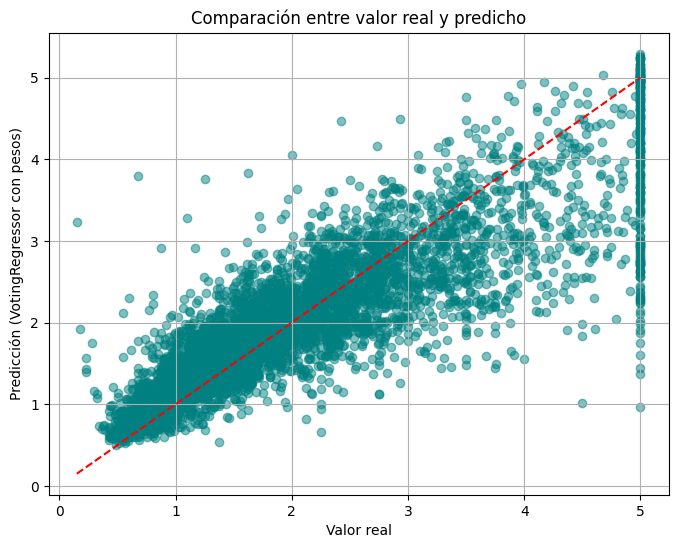

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_weighted, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Predicción (VotingRegressor con pesos)')
plt.title('Comparación entre valor real y predicho')
plt.grid(True)
plt.show()


In [ ]:
# Escalar la observación
sample_scaled = scaler.transform(sample)

# Predecir usando el modelo ponderado
prediccion_sample = voting_weighted.predict(sample_scaled)[0]

# Mostrar la predicción convertida a dólares
print("🏠 Predicción con VotingRegressor ponderado:", round(prediccion_sample * 100000, 2), "USD")


🏠 Predicción con VotingRegressor ponderado: 186459.69 USD


In [ ]:
KNN= 189560.0
SVR=186865.44

print(KNN - SVR)

2694.5599999999977


In [ ]:
# promedio entre KNN y SVR
(KNN + SVR)/2

188212.72

In [ ]:
voting_weighted = VotingRegressor(estimators=[
    ('lr', lr_scaled),
    ('tree', tree_scaled),
    ('knn', knn_scaled),
    ('svm', svm_scaled)
], weights=[0, 0, 2, 3])  # Más peso a KNN y SVR

voting_weighted.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('tree', DecisionTreeRegressor(max_depth=5)),
                            ('knn', KNeighborsRegressor()), ('svm', SVR())],
                weights=[0, 0, 2, 3])

In [ ]:
y_pred_weighted = voting_weighted.predict(X_test_scaled)
mse_weighted = mean_squared_error(y_test, y_pred_weighted)
r2_weighted = r2_score(y_test, y_pred_weighted)

print("\n⚖️ VotingRegressor (con pesos)")
print(f"MSE: {mse_weighted:.4f} | R²: {r2_weighted:.4f}")


⚖️ VotingRegressor (con pesos)
MSE: 0.3525 | R²: 0.7336


In [ ]:
# Escalar la observación
sample_scaled = scaler.transform(sample)

# Predecir usando el modelo ponderado
prediccion_sample = voting_weighted.predict(sample_scaled)[0]

# Mostrar la predicción convertida a dólares
print("🏠 Predicción con VotingRegressor ponderado:", round(prediccion_sample * 100000, 2), "USD")

🏠 Predicción con VotingRegressor ponderado: 187943.26 USD


### Ejemplo de voting clasificación

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))
np.array_equal(eclf1.named_estimators_.lr.predict(X),
               eclf1.named_estimators_['lr'].predict(X))
eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))

[1 1 1 2 2 2]
[1 1 1 2 2 2]


## Ejemplo de regresión con RF


In [ ]:
# Cargar el dataset California Housing con as_frame=True para obtener un DataFrame
data = fetch_california_housing(as_frame=True)
# Extraer el DataFrame, que contiene las columnas predictoras y la columna objetivo (MedHouseVal)
df = data.frame

In [ ]:
# Separar las variables predictoras (X) y la variable objetivo (y)
# Excluir la columna 'MedHouseVal' (valor de la vivienda) de X, usando axis=1 para indicar que es una columna
X = df.drop('MedHouseVal', axis=1)
# Asignar la columna 'MedHouseVal' como la variable objetivo y (valores de viviendas en cientos de miles de dólares)
y = df['MedHouseVal']

# 2. Preparar los datos
# Importar herramientas para dividir los datos y escalar las características
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# split de test y train

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Usar RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instancia de algoritmo
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamiento
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
sample = pd.DataFrame([{
    'MedInc': 3.5,      # Ingreso medio del vecindario ($35,000 en decenas de miles)
    'HouseAge': 25,     # Edad promedio de las casas (25 años)
    'AveRooms': 4,      # Promedio de 4 habitaciones por vivienda
    'AveBedrms': 1,     # Promedio de 1 dormitorio por vivienda
    'Population': 1000, # Población del área (1000 personas)
    'AveOccup': 3,      # Promedio de 3 ocupantes por hogar
    'Latitude': 34,     # Latitud geográfica (cerca de Los Ángeles)
    'Longitude': -118   # Longitud geográfica
}])

In [ ]:
# Escalar la observación de prueba para los modelos KNN y SVR, usando el mismo escalador ajustado en X_train
sample_scaled = scaler.transform(sample)

# 5. Hacer las predicciones
# Predecir el valor de la vivienda con cada modelo y convertir el resultado a dólares (multiplicar por 100,000)
# Redondear a 2 decimales para mayor claridad
# Regresión Lineal usa datos no escalados
print("🔵 Regresión Lineal:", round(lr.predict(sample)[0] * 100000, 2), "USD")
# Árbol de Decisión usa datos no escalados
print("🌳 Árbol de Decisión:", round(tree.predict(sample)[0] * 100000, 2), "USD")
# KNN usa datos escalados, predice basado en los 5 vecinos más cercanos
print("📍 KNN:", round(knn.predict(sample_scaled)[0] * 100000, 2), "USD")
# SVR usa datos escalados, predice basado en un hiperplano de regresión
print("📊 SVR:", round(svm.predict(sample_scaled)[0] * 100000, 2), "USD")
# Redondear a 2 decimales para mayor claridad
print("🌳🌳🌳🌳 Random Forest:", round(rf.predict(sample)[0] * 100000, 2), "USD")

🔵 Regresión Lineal: 197256.72 USD
🌳 Árbol de Decisión: 165550.25 USD
📍 KNN: 189560.0 USD
📊 SVR: 186865.44 USD
🌳🌳🌳🌳 Random Forest: 189051.0 USD


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en X_test escalado (todos usan el mismo conjunto)
models = {
    "Regresión Lineal": lr_scaled,
    "Árbol de Decisión": tree_scaled,
    "KNN": knn_scaled,
    "SVR": svm_scaled,
    "VotingRegressor": voting,
    "Random Forest": rf
}

print("📊 Comparación de desempeño en el conjunto de prueba:\n")
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:<20} | MSE: {mse:.4f} | R²: {r2:.4f}")

📊 Comparación de desempeño en el conjunto de prueba:

Regresión Lineal     | MSE: 0.5411 | R²: 0.5911
Árbol de Decisión    | MSE: 0.5268 | R²: 0.6019
KNN                  | MSE: 0.4317 | R²: 0.6738
SVR                  | MSE: 0.3510 | R²: 0.7347
VotingRegressor      | MSE: 0.3771 | R²: 0.7150
Random Forest        | MSE: 1.5293 | R²: -0.1557


In [ ]:
# Usar RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instancia de algoritmo
rf2 = RandomForestRegressor(n_estimators=1000, random_state=42)

# Entrenamiento
rf2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
# Escalar la observación de prueba para los modelos KNN y SVR, usando el mismo escalador ajustado en X_train
sample_scaled = scaler.transform(sample)

# 5. Hacer las predicciones
# Predecir el valor de la vivienda con cada modelo y convertir el resultado a dólares (multiplicar por 100,000)
# Redondear a 2 decimales para mayor claridad
# Regresión Lineal usa datos no escalados
print("🔵 Regresión Lineal:", round(lr.predict(sample)[0] * 100000, 2), "USD")
# Árbol de Decisión usa datos no escalados
print("🌳 Árbol de Decisión:", round(tree.predict(sample)[0] * 100000, 2), "USD")
# KNN usa datos escalados, predice basado en los 5 vecinos más cercanos
print("📍 KNN:", round(knn.predict(sample_scaled)[0] * 100000, 2), "USD")
# SVR usa datos escalados, predice basado en un hiperplano de regresión
print("📊 SVR:", round(svm.predict(sample_scaled)[0] * 100000, 2), "USD")
# Redondear a 2 decimales para mayor claridad
print("🌳🌳🌳🌳 Random Forest:", round(rf.predict(sample)[0] * 100000, 2), "USD")
# Redondear a 2 decimales para mayor claridad
print("🌳🌳🌳🌳 Random Forest2:", round(rf2.predict(sample)[0] * 100000, 2), "USD")

🔵 Regresión Lineal: 197256.72 USD
🌳 Árbol de Decisión: 165550.25 USD
📍 KNN: 189560.0 USD
📊 SVR: 186865.44 USD
🌳🌳🌳🌳 Random Forest: 189051.0 USD
🌳🌳🌳🌳 Random Forest2: 185502.6 USD


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en X_test escalado (todos usan el mismo conjunto)
models = {
    "Regresión Lineal": lr_scaled,
    "Árbol de Decisión": tree_scaled,
    "KNN": knn_scaled,
    "SVR": svm_scaled,
    "VotingRegressor": voting,
    "Random Forest": rf,
    "Random Forest2": rf2
}

print("📊 Comparación de desempeño en el conjunto de prueba:\n")
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:<20} | MSE: {mse:.4f} | R²: {r2:.4f}")

📊 Comparación de desempeño en el conjunto de prueba:

Regresión Lineal     | MSE: 0.5411 | R²: 0.5911
Árbol de Decisión    | MSE: 0.5268 | R²: 0.6019
KNN                  | MSE: 0.4317 | R²: 0.6738
SVR                  | MSE: 0.3510 | R²: 0.7347
VotingRegressor      | MSE: 0.3771 | R²: 0.7150
Random Forest        | MSE: 1.5293 | R²: -0.1557
Random Forest2       | MSE: 1.4502 | R²: -0.0960
